In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/celebal internship/air quality index/one_month_sikkim.csv')
df.head()

Mounted at /content/drive


,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,54,149.0,2023-07-03:18,4.0,77.0,19.0,14.00,11.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,56,154.7,2023-07-03:17,5.0,75.3,20.3,14.67,10.0,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,57,160.3,2023-07-03:16,6.0,73.7,21.7,15.33,9.0,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,59,166.0,2023-07-03:15,7.0,72.0,23.0,16.00,8.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,56,154.7,2023-07-03:14,5.7,78.0,21.3,15.00,10.0,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

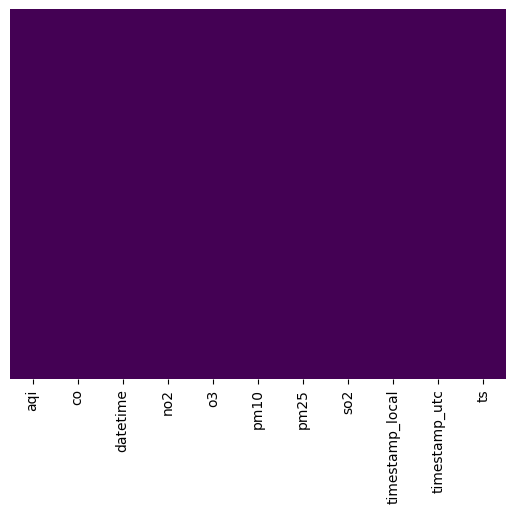

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi              721 non-null    int64  
 1   co               721 non-null    float64
 2   datetime         721 non-null    object 
 3   no2              721 non-null    float64
 4   o3               721 non-null    float64
 5   pm10             721 non-null    float64
 6   pm25             721 non-null    float64
 7   so2              721 non-null    float64
 8   timestamp_local  721 non-null    object 
 9   timestamp_utc    721 non-null    object 
 10  ts               721 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 62.1+ KB


In [7]:
y=df.iloc[:,0] ## dependent features
y

0      54
1      56
2      57
3      59
4      56
       ..
716    77
717    85
718    85
719    86
720    87
Name: aqi, Length: 721, dtype: int64

In [8]:
df.columns

Index(['aqi', 'co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts'],
      dtype='object')

In [9]:
X=df[['co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts']] ## independent features

In [10]:
X

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,149.0,2023-07-03:18,4.0,77.0,19.0,14.00,11.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,154.7,2023-07-03:17,5.0,75.3,20.3,14.67,10.0,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,160.3,2023-07-03:16,6.0,73.7,21.7,15.33,9.0,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,166.0,2023-07-03:15,7.0,72.0,23.0,16.00,8.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,154.7,2023-07-03:14,5.7,78.0,21.3,15.00,10.0,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800
...,...,...,...,...,...,...,...,...,...,...
716,173.7,2023-06-03:22,7.7,81.7,35.7,24.33,6.3,2023-06-04T03:30:00,2023-06-03T22:00:00,1685829600
717,178.0,2023-06-03:21,9.0,77.0,41.0,28.00,7.0,2023-06-04T02:30:00,2023-06-03T21:00:00,1685826000
718,188.0,2023-06-03:20,11.3,76.7,41.0,28.33,7.3,2023-06-04T01:30:00,2023-06-03T20:00:00,1685822400
719,198.0,2023-06-03:19,13.7,76.3,41.0,28.67,7.7,2023-06-04T00:30:00,2023-06-03T19:00:00,1685818800


In [11]:
X.isnull()

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
716,False,False,False,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False,False,False,False
718,False,False,False,False,False,False,False,False,False,False
719,False,False,False,False,False,False,False,False,False,False


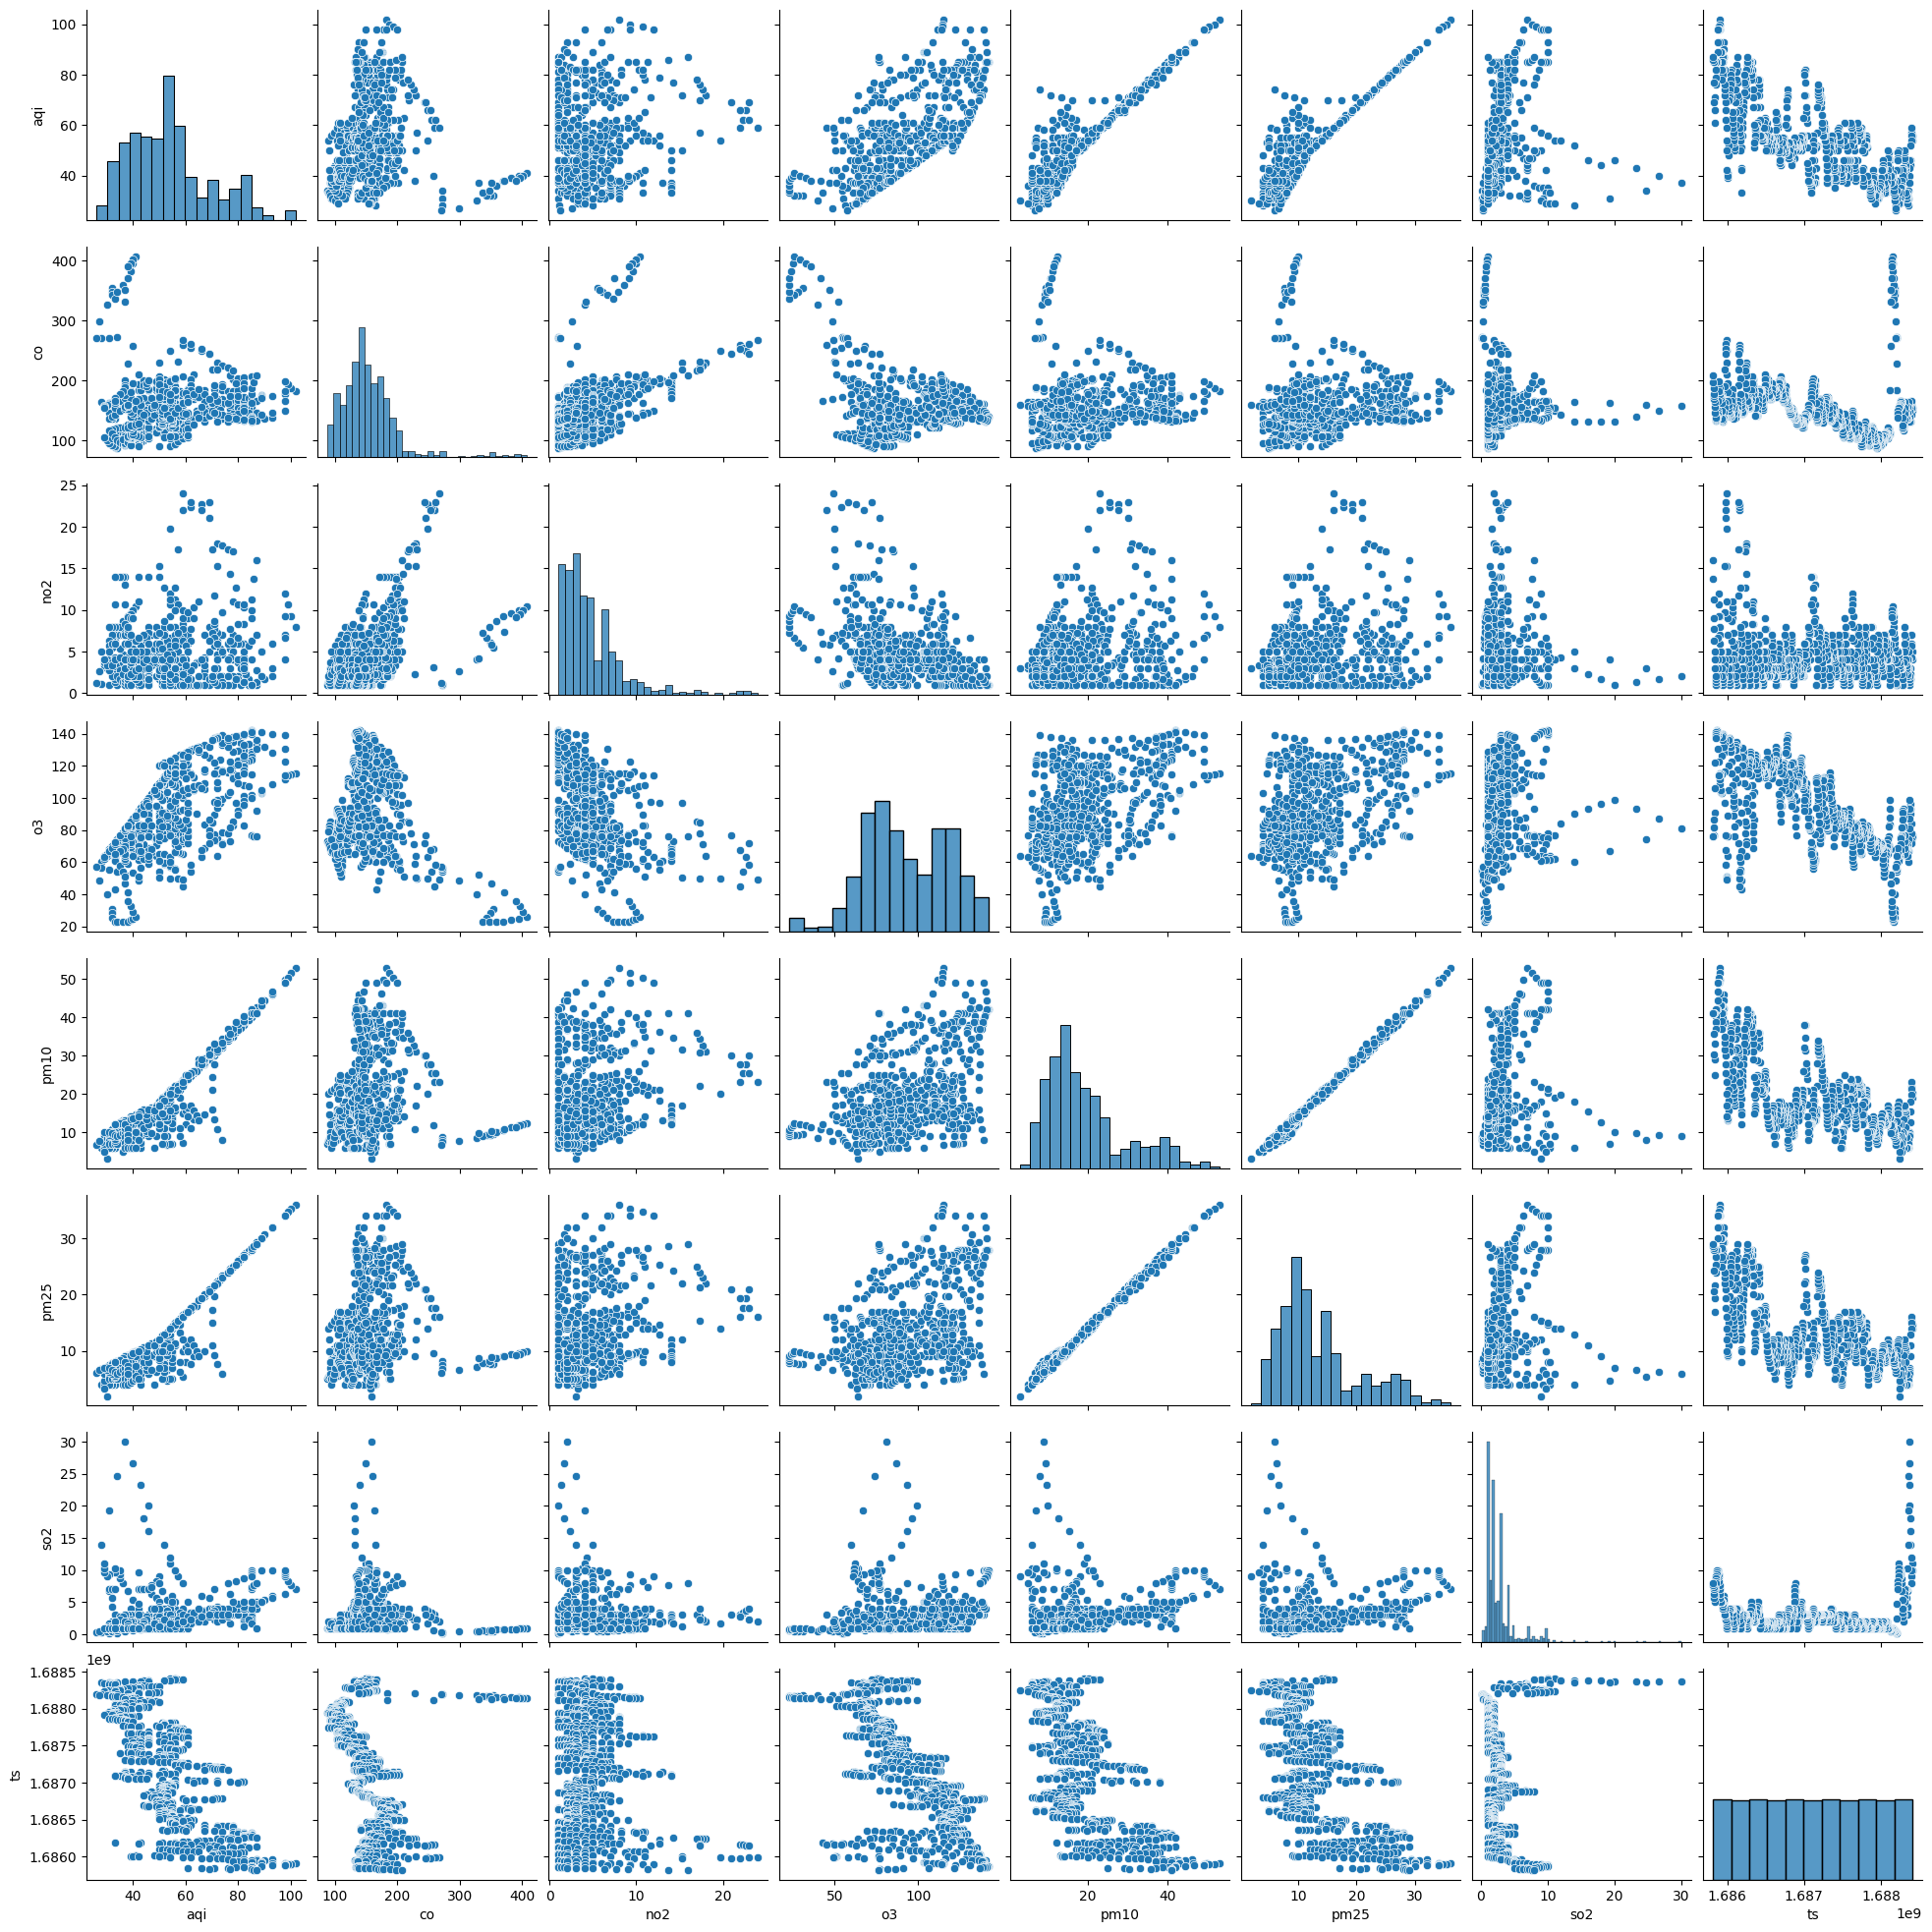

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,aqi,co,no2,o3,pm10,pm25,so2,ts
aqi,1.000000,0.094010,0.115574,0.597976,0.934809,0.932378,0.167748,-0.730469
co,0.094010,1.000000,0.451484,-0.190545,0.073464,0.101684,-0.028949,-0.206287
no2,0.115574,0.451484,1.000000,-0.451893,0.194213,0.205455,-0.037764,-0.148346
o3,0.597976,-0.190545,-0.451893,1.000000,0.415879,0.394705,0.092113,-0.668352
pm10,0.934809,0.073464,0.194213,0.415879,1.000000,0.998019,0.184600,-0.643481
pm25,0.932378,0.101684,0.205455,0.394705,0.998019,1.000000,0.173258,-0.630641
so2,0.167748,-0.028949,-0.037764,0.092113,0.184600,0.173258,1.000000,0.060035
ts,-0.730469,-0.206287,-0.148346,-0.668352,-0.643481,-0.630641,0.060035,1.000000


<ipython-input-14-eb5df078eb6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


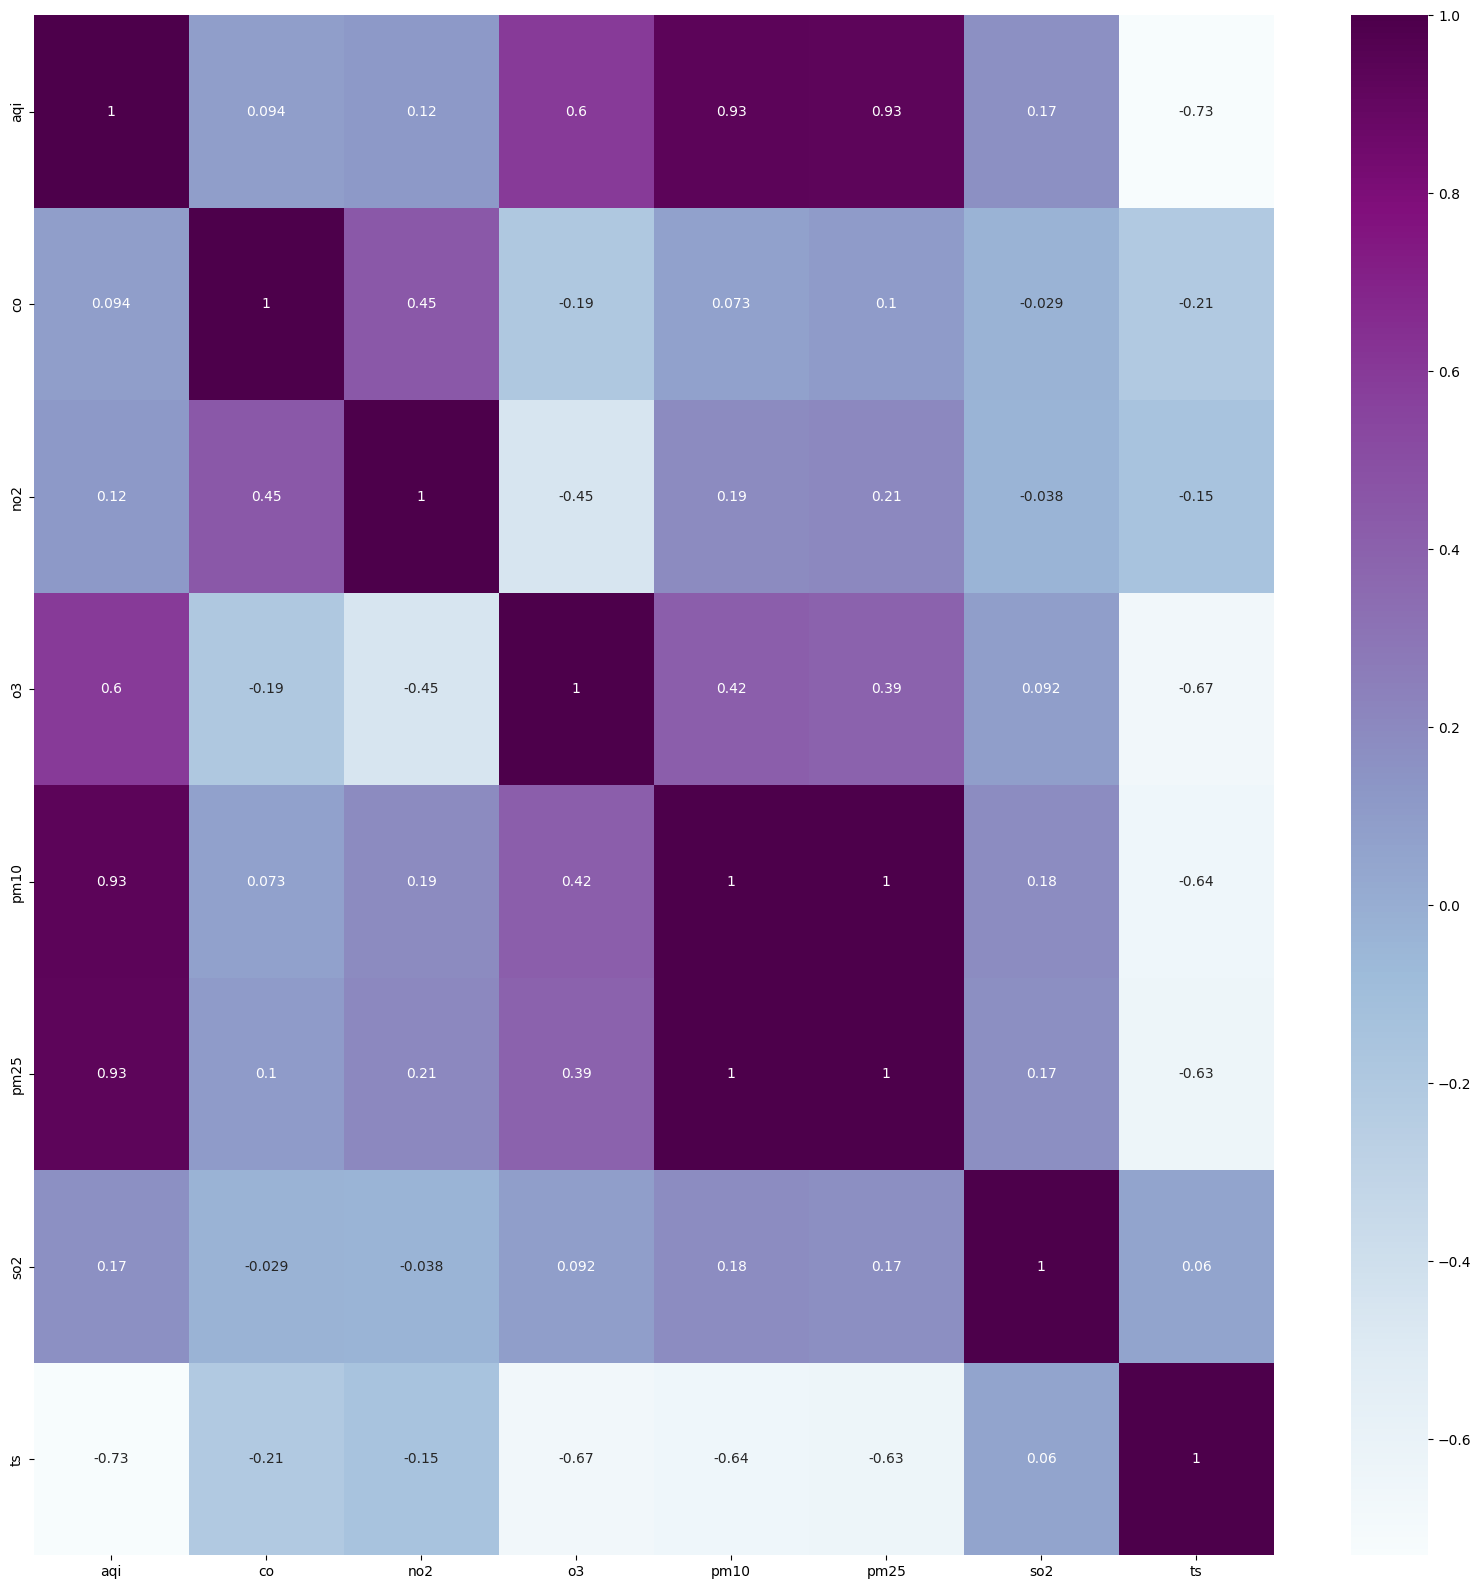

In [14]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BuPu")

In [15]:
corrmat.index

Index(['aqi', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'ts'], dtype='object')

In [16]:
X = X.drop(['datetime'],axis=1)
X = X.drop(['timestamp_local'],axis=1)
X = X.drop(['timestamp_utc'],axis=1)
X.head()

,co,no2,o3,pm10,pm25,so2,ts
0,149.0,4.0,77.0,19.0,14.00,11.0,1688407200
1,154.7,5.0,75.3,20.3,14.67,10.0,1688403600
2,160.3,6.0,73.7,21.7,15.33,9.0,1688400000
3,166.0,7.0,72.0,23.0,16.00,8.0,1688396400
4,154.7,5.7,78.0,21.3,15.00,10.0,1688392800


In [17]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
X.head()

,co,no2,o3,pm10,pm25,so2,ts
0,149.0,4.0,77.0,19.0,14.00,11.0,1688407200
1,154.7,5.0,75.3,20.3,14.67,10.0,1688403600
2,160.3,6.0,73.7,21.7,15.33,9.0,1688400000
3,166.0,7.0,72.0,23.0,16.00,8.0,1688396400
4,154.7,5.7,78.0,21.3,15.00,10.0,1688392800


In [19]:
print(model.feature_importances_)

[0.00146513 0.00233621 0.09399094 0.38843967 0.40206183 0.00401819
 0.10768803]


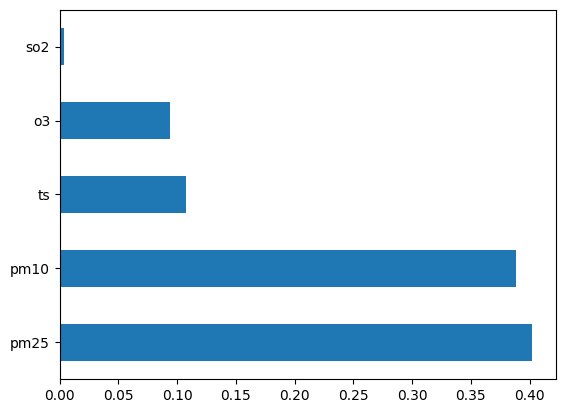

In [20]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<ipython-input-21-0f415a98584e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='aqi', ylabel='Density'>

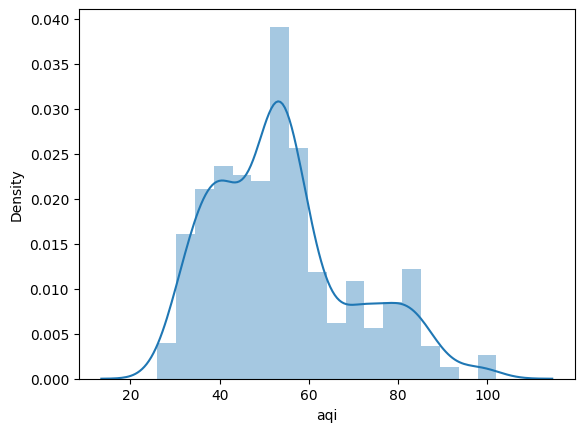

In [21]:
sns.distplot(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
regressor.coef_

array([ 1.05295082e-02,  5.36432414e-01,  2.38176523e-01, -6.24232101e-01,
        2.64370087e+00,  6.97672239e-02,  5.59545358e-07])

In [25]:
regressor.intercept_

-940.4851555342075

In [26]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9482853538366557


In [27]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9184155693532917


In [28]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score.mean()

0.6388539664396093

In [29]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
co,1.052951e-02
no2,5.364324e-01
o3,2.381765e-01
pm10,-6.242321e-01
pm25,2.643701e+00
so2,6.976722e-02
ts,5.595454e-07


<ipython-input-30-b2472d395ee6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='aqi', ylabel='Density'>

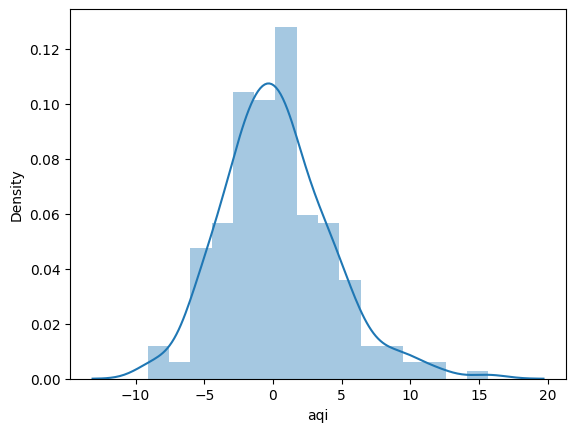

In [30]:
prediction=regressor.predict(X_test)
sns.distplot(y_test-prediction)

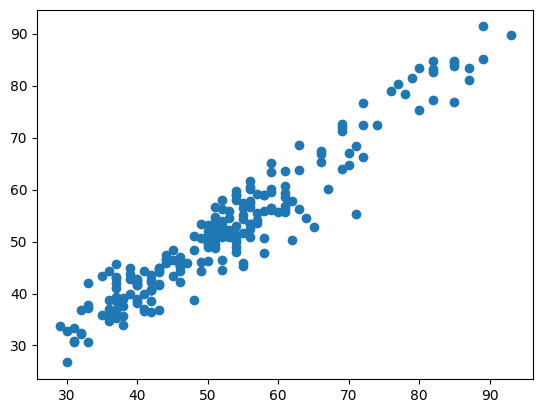

In [31]:
plt.scatter(y_test,prediction)

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3.008104703382697
MSE: 15.496499055409654
RMSE: 3.936559291489162
